In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

stu = pd.read_excel('./data/raw/university_data.xlsx', sheet_name='Students')
pro = pd.read_excel('./data/raw/university_data.xlsx', sheet_name='Professors')

In [6]:
stu.columns

Index(['Student GUID', 'Name', 'Research Interests', 'University Field'], dtype='object')

In [5]:
print(f"Students: {stu.shape} Professors: {pro.shape}")

Students: (10000, 4) Professors: (10000, 4)


In [10]:
stu.describe()

,Student GUID,Name,Research Interests,University Field
count,10000,10000,10000,10000
unique,10000,9377,9997,10
top,c1c5fc27-048a-4fad-b32a-57b6613f5c6d,Michael Miller,"Condensed Matter Physics, Astrophysics, Experi...",Chemistry
freq,1,7,2,1069


In [11]:
pro.describe()

,Professor GUID,Name,Research Interests,University Field
count,10000,10000,10000,10000
unique,10000,9366,9999,10
top,ee1d5410-3fd8-444e-b847-b6d7b41137fc,David Jones,"Medicinal Chemistry, Physical Chemistry, Analy...",Computer Science
freq,1,8,2,1065


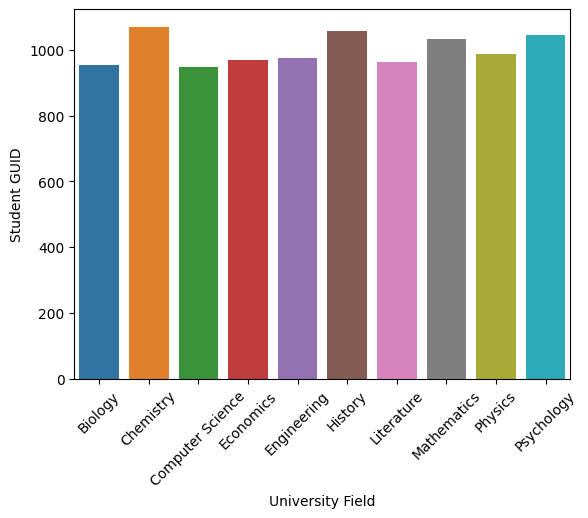

In [22]:
data_1 = stu.groupby(['University Field'])['Student GUID'].count().reset_index()
fig_1 = sns.barplot(x='University Field', y='Student GUID', data=data_1)
fig_1.set_xticklabels(fig_1.get_xticklabels(), rotation=45)
plt.show()

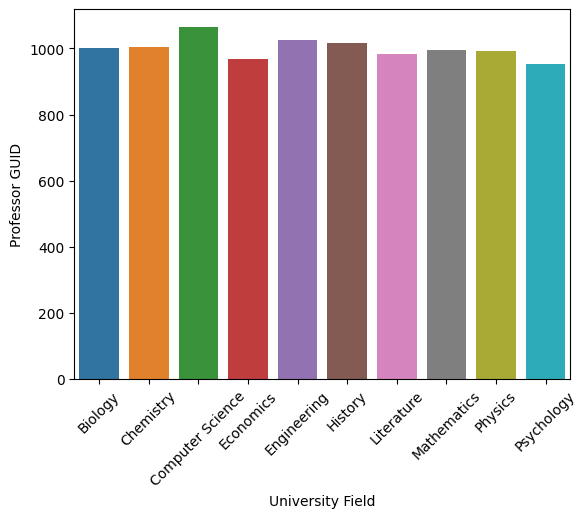

In [23]:
data_2 = pro.groupby(['University Field'])['Professor GUID'].count().reset_index()
fig_2 = sns.barplot(x='University Field', y='Professor GUID', data=data_2)
fig_2.set_xticklabels(fig_2.get_xticklabels(), rotation=45)
plt.show()

In [27]:
print(f"Unique Research interests of Students and Professors are {len(stu['Research Interests'].unique())} and {len(pro['Research Interests'].unique())}")

Unique Research interests of Students and Professors are 9997 and 9999


Lets Deep Dive into research interests to see if its really unique

In [7]:
def unique_skills(df):
    lst = df['Research Interests'].tolist()
    lst = [word.strip() for row in lst for word in row.split(',')]
    return list(set(lst))

print(f"Number of unique skills for students and professors are {len(unique_skills(stu))} and {len(unique_skills(pro))}")

Number of unique skills for students and professors are 98 and 98


Now lets further deep dive to see if the skills between professors and students are same

In [8]:
stu_skills = set(unique_skills(stu))
pro_skills = set(unique_skills(pro))

print(f"skills that are in students that are not in professors{list(stu_skills - pro_skills)}")

print(f"skills that are in professors that are not in students {list(pro_skills - stu_skills)}")


skills that are in students that are not in professors[]
skills that are in professors that are not in students []


Considering there are inly 98 unique skills available on both data, now lets check the unique combination of skills for each university field

In [9]:
def clean_text(text):
    result = text.split(',')
    result = [item.strip() for item in result]
    result = sorted(result)
    result = ','.join(result)
    return result

l = stu['Research Interests'].apply(clean_text)

print(len(l.unique()))

10


Therefore its clear that there are 98 unqiue skills with 10 combinations where 1 combination for each university field 